In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
def d_plus(s0, sigma, T, t, r, K):
  return ((r + sigma**2 / 2) * (T - t) + np.log(s0 / K)) / (sigma * np.sqrt(T - t))

def d_minus(s0, sigma, T, t, r, K):
  return ((r - sigma**2 / 2) * (T - t) + np.log(s0 / K)) / (sigma * np.sqrt(T - t))

def call_option(s0, sigma, T, t, r, K):
  return (
      s0 * norm.cdf(d_plus(s0, sigma, T, t, r, K)) 
      - K * np.exp(- r * (T - t)) * norm.cdf(d_minus(s0, sigma, T, t, r, K))
  )


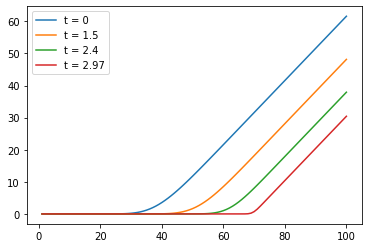

In [ ]:
s0_values = np.linspace(1, 100, 100)
sigma = 0.1
T = 3
t_values = [0, 0.5 * T, 0.8 * T, 0.99 * T]
r = 0.2
K = 70

for t in t_values:
  c_values = []
  for s0 in s0_values:
    c_values.append(call_option(s0, sigma, T, t, r, K))
  plt.plot(s0_values, c_values, label=f't = {np.round(t, 2)}')

plt.legend()
plt.show()

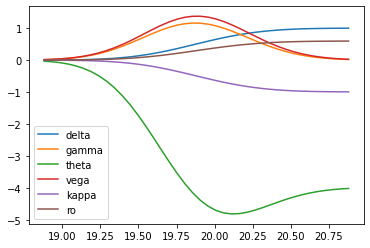

In [ ]:
def delta(s0_values, sigma, T, t, r, K):
  delta_values = []
  for s0 in s0_values: 
    delta_values.append(norm.cdf(d_plus(s0, sigma, T, t, r, K)))
  return delta_values

def gamma(s0_values, sigma, T, t, r, K):
  gamma_values = []
  for s0 in s0_values: 
    gamma_values.append(
        np.exp(- d_plus(s0, sigma, T, t, r, K) ** 2 / 2) 
        / (s0 * sigma * np.sqrt(T - t) * np.sqrt(2 * np.pi))
    )
  return gamma_values

def theta(s0_values, sigma, T, t, r, K):
  theta_values = []
  for s0 in s0_values:
    theta_values.append(
        - s0 * sigma * np.exp(- d_plus(s0, sigma, T, t, r, K) ** 2 / 2) 
        / (np.sqrt(2 * np.pi) * 2 * np.sqrt(T - t)) 
        - r * K * np.exp( - r * (T - t)) * norm.cdf(d_minus(s0, sigma, T, t, r, K))
    )
  return theta_values

def vega(s0_values, sigma, T, t, r, K):
  vega_values = []
  for s0 in s0_values:
    vega_values.append(
        s0 * np.sqrt(T - t) * np.exp(- d_plus(s0, sigma, T, t, r, K) ** 2 / 2) 
        / np.sqrt(2 * np.pi)
    )
  return vega_values

def kappa(s0_values, sigma, T, t, r, K):
  kappa_values = []
  for s0 in s0_values:
    kappa_values.append(
        - np.exp(- r * (T - t)) 
        * norm.cdf(d_minus(s0, sigma, T, t, r, K))
    )
  return kappa_values

def ro(s0_values, sigma, T, t, r, K):
  ro_values = []
  for s0 in s0_values:
    ro_values.append(
        K * np.exp(- r * (T - t)) * (T - t) * norm.cdf(d_minus(s0, sigma, T, t, r, K))
    )
  return ro_values

K = 20
s0_values = np.linspace(K * np.exp(- r * (T - t)) - 1, K * np.exp(- r * (T - t)) + 1, 40)

plt.plot(s0_values, delta(s0_values, sigma, T, t, r, K), label='delta')
plt.plot(s0_values, gamma(s0_values, sigma, T, t, r, K), label='gamma')
plt.plot(s0_values, theta(s0_values, sigma, T, t, r, K), label='theta')
plt.plot(s0_values, vega(s0_values, sigma, T, t, r, K), label='vega')
plt.plot(s0_values, kappa(s0_values, sigma, T, t, r, K), label='kappa')
plt.plot(s0_values, ro(s0_values, sigma, T, t, r, K), label='ro')

plt.legend()
plt.show()

1.161834242728283


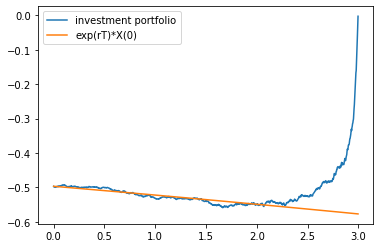

In [ ]:
def brownian_motion_st(s0, r, sigma, t):
  return (
      s0 * np.exp(
              (r - sigma**2 / 2) * t 
              + sigma * np.random.normal(0, t)
              )
  )

def investment_portfolio(st, sigma, T, t, r, K):
  c = call_option(st, sigma, T, t, r, K)
  d = d_plus(st, sigma, T, t, r, K)
  fi = norm.cdf(d)
  return (c - fi * st)

s0 = 1
sigma = 0.01
r = 0.05
T = 3
N = 1000
K = s0 * np.exp(r*T)
print(K)

x0 = investment_portfolio(s0, sigma, T, 0, r, K)

ti = T / N
t = [ti*i for i in range(N)]

portfolio_values = [investment_portfolio(s0, sigma, T, 0, r, K)]
for i in range(1, N):
  s0 = brownian_motion_st(s0, r, sigma, ti)
  portfolio_values.append(investment_portfolio(s0, sigma, T, ti*i, r, K))

plt.plot(t, portfolio_values, label='investment portfolio')
plt.plot(t, [x0 * np.exp(r * ti * i) for i in range(N)], label='exp(rT)*X(0)')
plt.legend()
plt.show()